# <center>Домашнее задание №2 по курсу "Научные основы криологии"</center>
### <center>Расчет основных характеристик дроссельных циклов</center>

Для каждого из первых трёх заданных дроссельных циклов провести 
расчет двух режимов работы при заданных в таблице параметрах. Контроль 
правильности  расчетов  проводится:  для  рефрижераторных  циклов -по 
удельной  холодопроизводительности,  холодильному  коэффиц
иенту  и 
степени  термодинамического  совершенства  цикла;  для  ожижительных 
циклов -по коэффициенту ожижения, затратам энергии для получения 
1кг
жидкого  продукта  и  степени  термодинамического  совершенства.  Для 
четвёртого цикла необходимо определить  следующие  у
дельные  величины: 
работу цикла, теплоту конденсации,  полезную холодопроизводительность, 
холодильный коэффициент и степень термодинамического совершенства. 
По результатам работы составить отчет, включающий задание, порядок 
и результаты расчета, схему кажд
ого цикла с обозначениями изображением в 
T-S-диаграмме процессов цикла. Отчет должен содержать также результаты 
оптимизации первых трёх циклов для определения максимальных значений 
степени термодинамического совершенства, значения температур, давлений, 
энтальпий для pасчетных pежимов pаботы.

Дополнительные данные: 
- недорекуперация в теплообменниках $\Delta T_H$ равна 15К
- внешний теплоприток $q_{o.c.} = 2 кДж/кг$;
- температура изотермического сжатия в компрессоре $Т_1=300K$
- изотермический КПД компрессоров 0.7

Для цикла с предварительным охлаждением дополнительно задано:
- температура предварительного охлаждения для -250 К, (хладагент аммиак)
- холодопроизводительность  в  дополнительном  цикле  на  единицу затрат работы $q_l = 2.8$ Дж"холода"/Дж"работы"

В  цикле  с  двойным  дросселированием  и  циркуляцией  части  потока дополнительно задано:
- Давление промежуточного сжатия $p_D$
- доля циркулирующего потока D

In [1]:
# Подключение необходимых библиотек и настройка окружения
import CoolProp.CoolProp as CP
import math
import CoolProp
from CoolProp.Plots import PropertyPlot
import matplotlib.pyplot as plt
from CoolProp.Plots.SimpleCycles import StateContainer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,9) #размер графиков (в дюймах)
def printAns(name, val, razmer):
    result = " %.3f " % val
    print(name+' ='+result+razmer)

### Задача 1
Дано: ПД; газ - Азот, давление 600/350;
#### Рефрижераторный режим.

In [2]:
#Дано
p2_1 = 600 * 10**5 #Па
p2_2 = 350 * 10**5 #Па
gas = 'Nitrogen'
Tx = 78 # для рефрежираторного режима
T1 = 300
q_oc = 2 * 10**3 #дж/кг
deltaTn = 15 # недорекуперация
R = 8.31 / CP.PropsSI('M',gas)
printAns('R',R, 'Дж/(кгК)') #индивидуальная газовая постоянная
n = 0.7 # кпд изотермический


R = 296.643 Дж/(кгК)


Определим давление $P_1$. 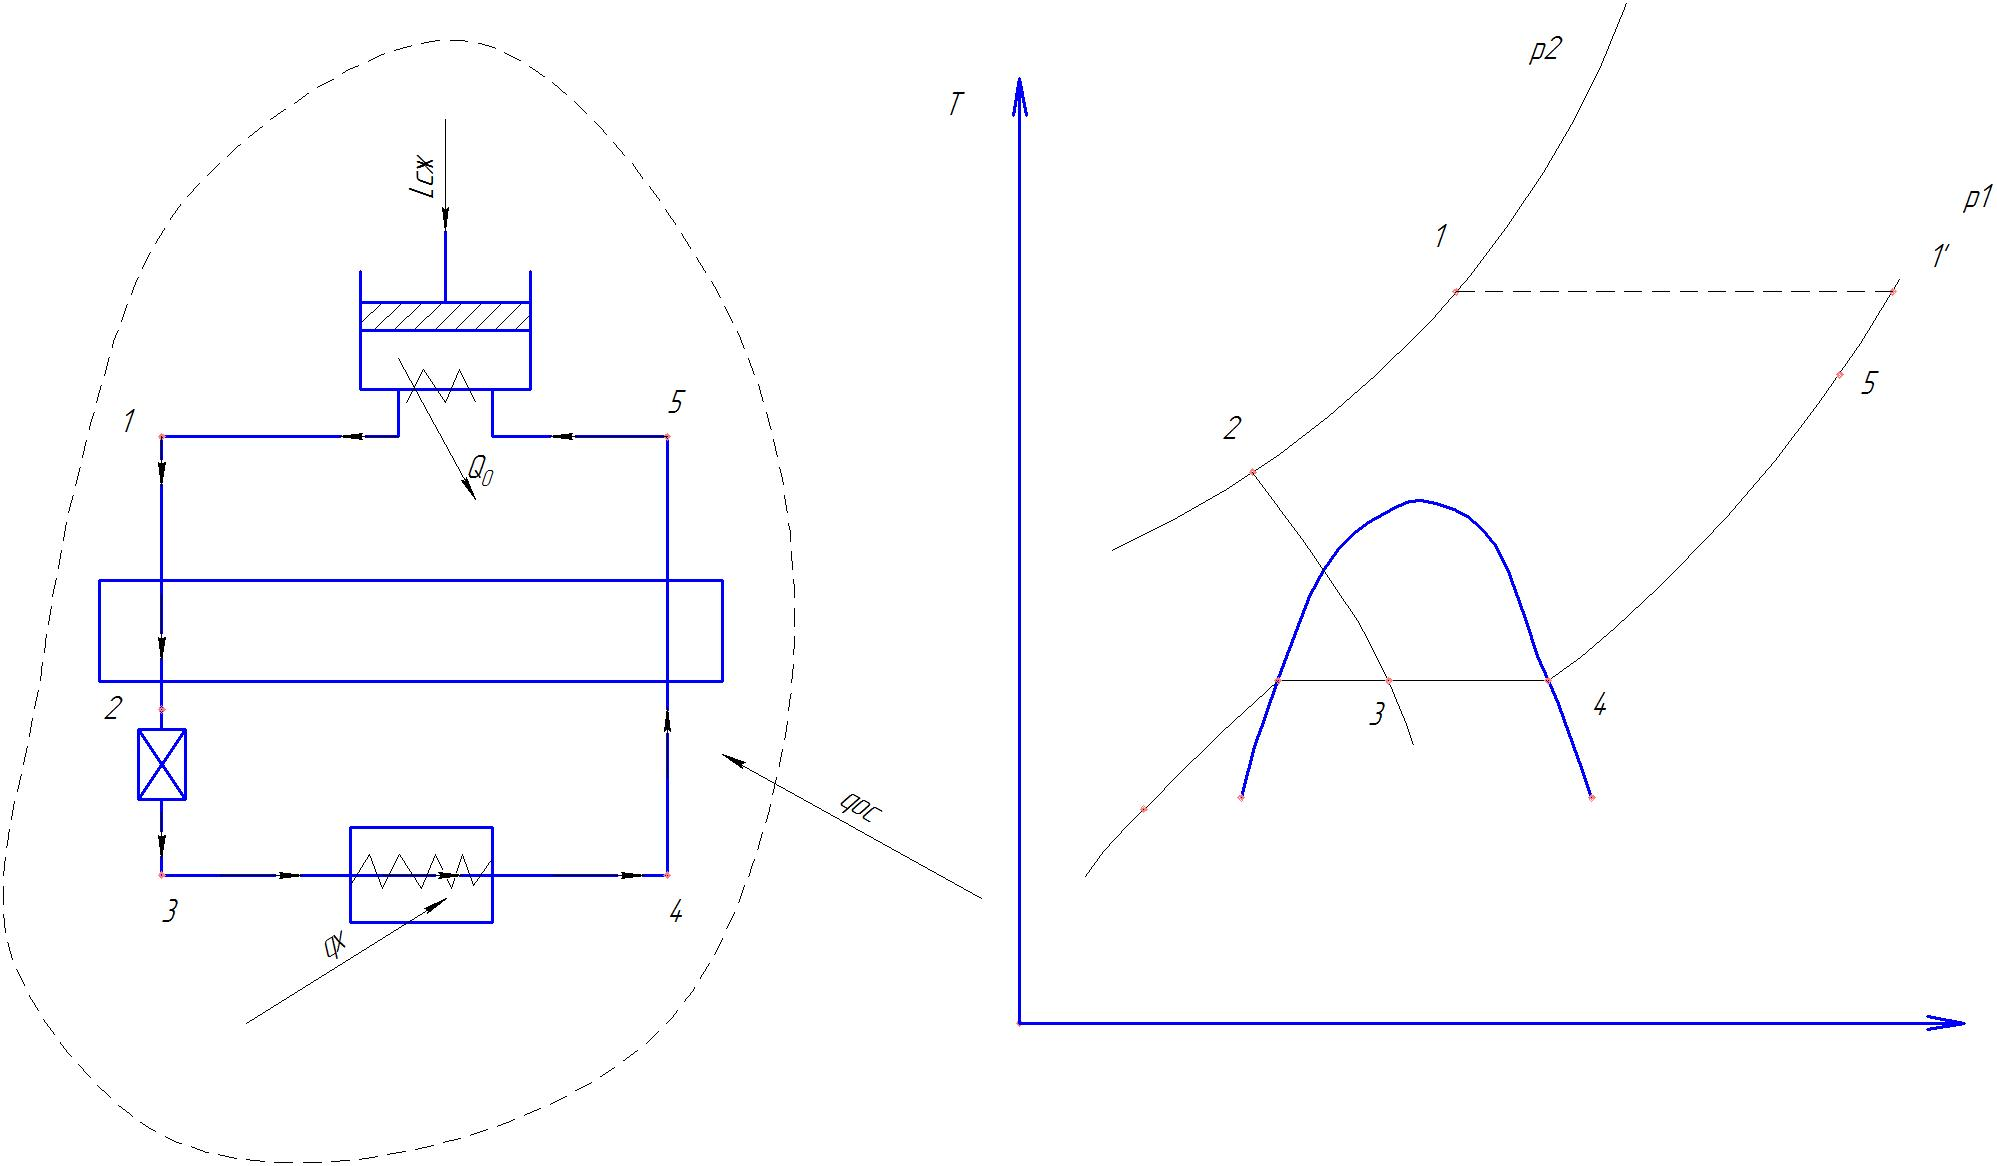
Так как точка 4 располагается на кривой насыщенного пара и температура в ней известна (Tx) можно определить давление.
По температуре $T_x$ определяем давление насыщенного пара $P_1$

In [3]:
p1 = CP.PropsSI('P','Q',1,'T',Tx,gas) # определим давление p1 зная Температуру Тх и то что в точке 4 насыщенный пар(Q=1)
printAns('p1', p1, 'Па')

p1 = 109255.214 Па


В точке 5 температура $T_5 = T_1- \Delta T_H$
По известным давлениям $P_1 , P_2$ и температурам $T_1 , T_5$ определим энтальпии.

In [4]:
T5 = T1 - deltaTn
printAns('T5', T5, 'K')
h5 = CP.PropsSI('H', 'P', p1, 'T', T5, gas)
h1_1 = CP.PropsSI('H', 'P', p2_1, 'T', T1, gas)
h1_2 = CP.PropsSI('H', 'P', p2_2, 'T', T1, gas)
printAns('h5', h5,'Дж/кг')
printAns('h1_1', h1_1,'Дж/кг')
printAns('h1_2', h1_2,'Дж/кг')

T5 = 285.000 K
h5 = 295553.756 Дж/кг
h1_1 = 276613.847 Дж/кг
h1_2 = 271570.054 Дж/кг


Определим холодопроизводительность $q_x = (h_5 - h_1) - q_{o.c.}$ 

In [5]:
qx_1 = (h5-h1_1) - q_oc
qx_2 = (h5-h1_2) - q_oc
printAns('qx_1',qx_1,'Дж/кг')
printAns('qx_2',qx_2,'Дж/кг')

qx_1 = 16939.909 Дж/кг
qx_2 = 21983.702 Дж/кг


Определим затрачиваемую работу( в данном случае работу сжатия ) по формуле

$ l = l_{сж} = \frac{RT ln(\frac{P_H}{P_вс})} {\eta_{из}} $

In [6]:
l_1 = (R*T1*math.log( p2_1/p1, math.e ))/n
l_2 = (R*T1*math.log( p2_2/p1, math.e ))/n
printAns('l_1',l_1, 'дж/кг')
printAns('l_2',l_2, 'дж/кг')

l_1 = 802005.438 дж/кг
l_2 = 733481.373 дж/кг


Холодильный коэффициент: $ \epsilon = \frac {q_x}{l}$

In [7]:
epsilon_1 = qx_1/l_1
epsilon_2 = qx_2/l_2
printAns('epsilon_1',epsilon_1,'')
printAns('epsilon_2',epsilon_2,'')

epsilon_1 = 0.021 
epsilon_2 = 0.030 


Степень термодинамического совершенства: $\eta_{T} = \frac {\epsilon}{\epsilon_K}$

$\epsilon_K = \frac {T_x}{T_1 - T_x}$

In [8]:
epsilon_K = Tx/(T1-Tx) 
printAns('epsilon_K', epsilon_K,'')
n_T_1 = epsilon_1 / epsilon_K # степень термодинамического совершенства
n_T_2 = epsilon_2 / epsilon_K # степень термодинамического совершенства
print("Степень термодинамического совершенства:")
printAns('n_T_1',n_T_1,'') 
printAns('n_T_2',n_T_2,'')

epsilon_K = 0.351 
Степень термодинамического совершенства:
n_T_1 = 0.060 
n_T_2 = 0.085 


### Ответ:
Удельная холодопроизводительность:

$q_x = 16939.909 Дж/кг$ для $p_2$ = 600 Бар

$q_x = 21983.702 Дж/кг$ для $p_2$ = 350 Бар

Холодильный коэффициент: 

$\epsilon = 0.021$ для $p_2$ = 600 Бар

$\epsilon = 0.030$ для $p_2$ = 350 Бар

Степень термодинамического совершенства: 

$\eta_T = 0.060$ для $p_2$ = 600 Бар

$\eta_T = 0.085$ для $p_2$ = 350 Бар

#### Ожижительный режим.
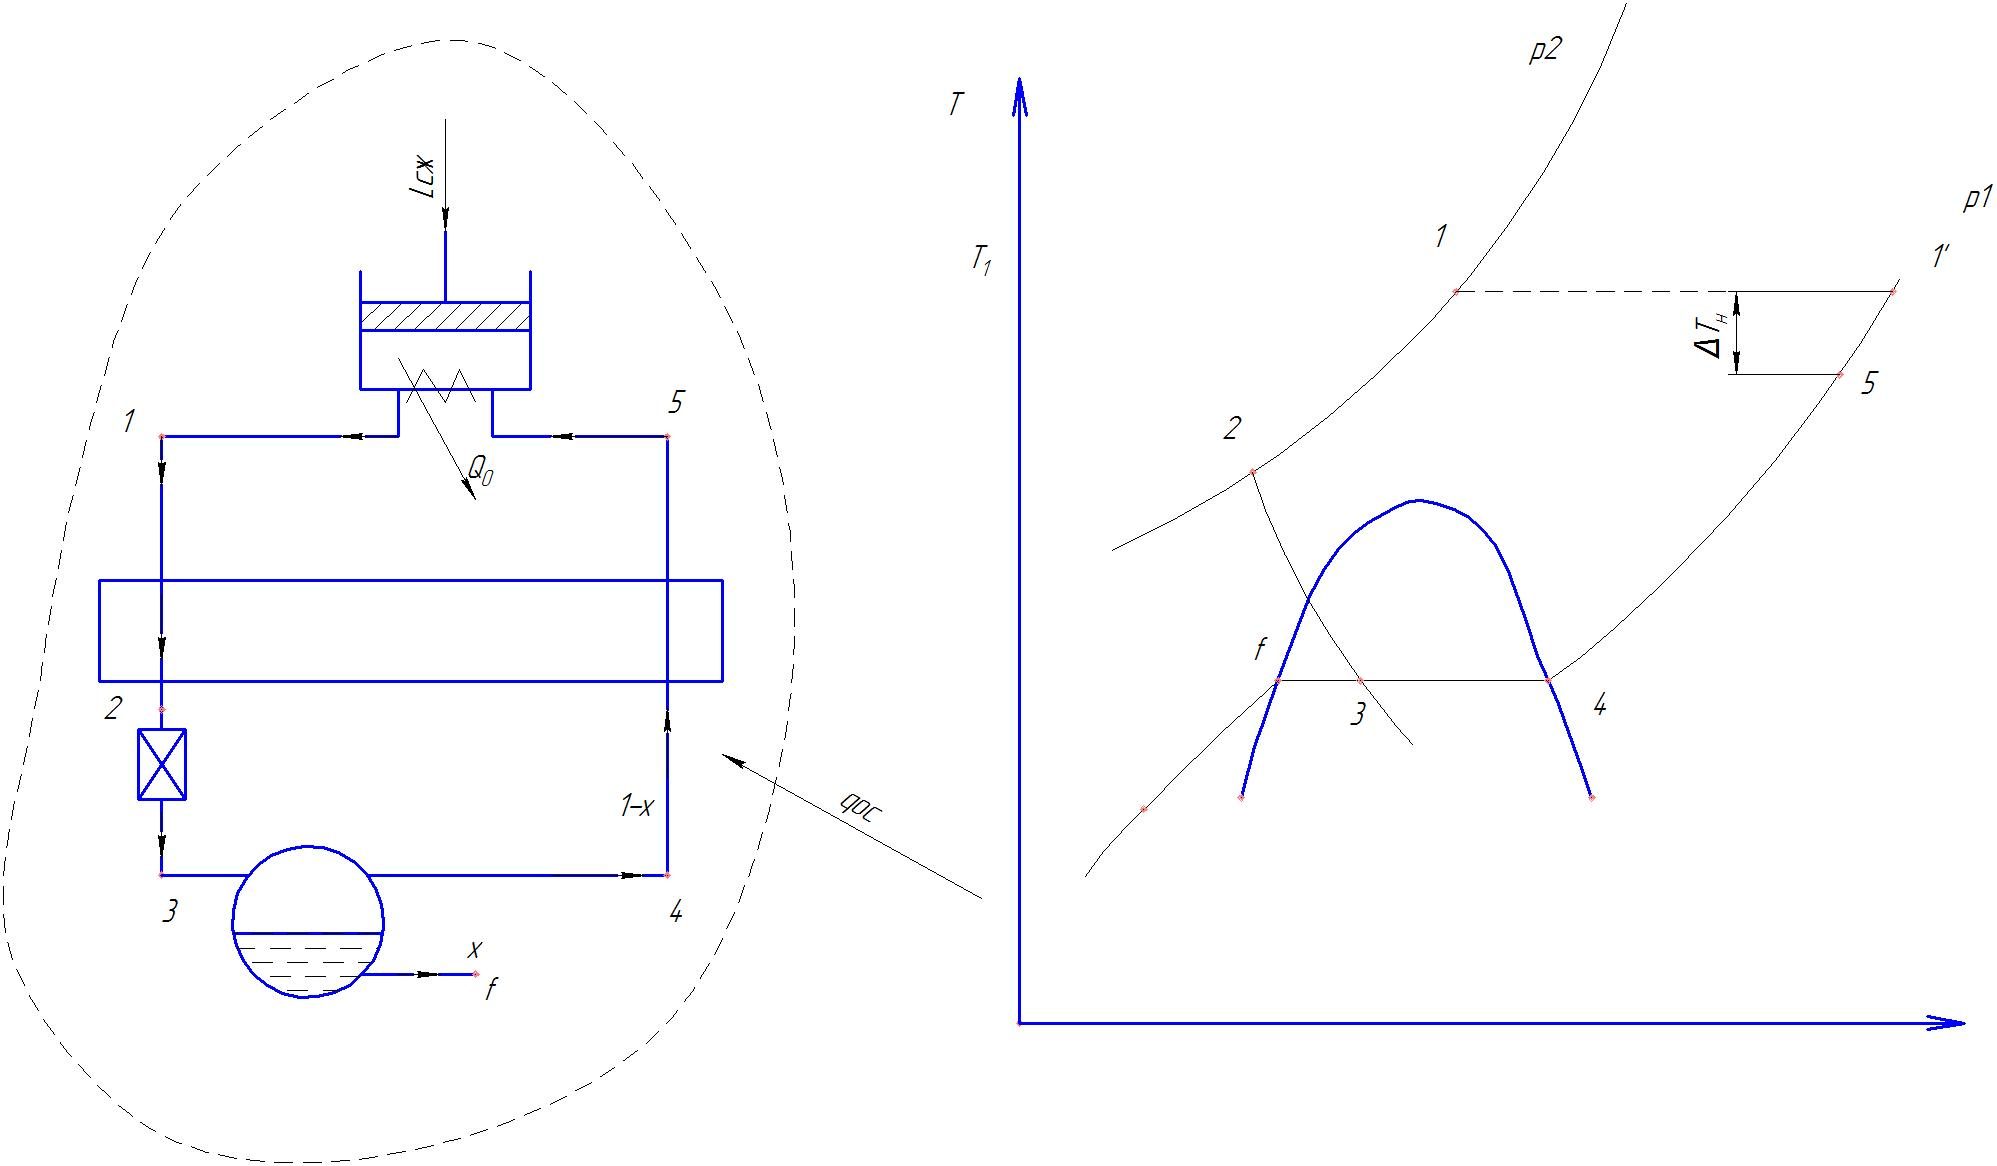

In [22]:
p1 = 1.75 * 10**5 # Па для ожижительного режима.
print(CP.PropsSI('H','Q',0,'T',111.5,'Methane'))

1123.9626226231564
